<a href="https://colab.research.google.com/github/codewithnickkk/Machine-Learning/blob/main/Cat_vs_Dog_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:29<00:00, 41.9MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D ,BatchNormalization, Dropout

In [48]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test' ,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [49]:
#Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [50]:
#Creating CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',input_shape=(256,256,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 111ms/step - loss: 1.3703 - accuracy: 0.5869 - val_loss: 0.6460 - val_accuracy: 0.6606
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5619 - accuracy: 0.7109 - val_loss: 0.5409 - val_accuracy: 0.7306
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5164 - accuracy: 0.7518 - val_loss: 0.6126 - val_accuracy: 0.7092
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4470 - accuracy: 0.7951 - val_loss: 0.4619 - val_accuracy: 0.7886
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3772 - accuracy: 0.8295 - val_loss: 0.4406 - val_accuracy: 0.8052
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3089 - accuracy: 0.8660 - val_loss: 0.4663 - val_accuracy: 0.7882
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2355 - accuracy: 0.9025 - val_loss: 0.5411 - val_ac

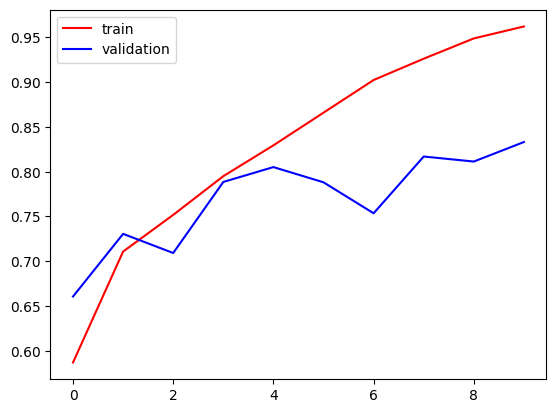

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

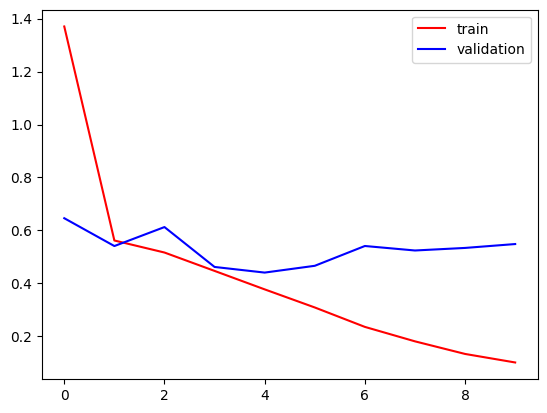

In [54]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## **It seems there is overfitting taking place. ways to reduce overfitting**
#Add more Data
#Data augmentation
#L1/L2 Regularizer
#Dropout
#Batch norm
#Reduce Complexity

In [73]:
import cv2
test_image = cv2.imread('/content/cat2.jpg.crdownload')

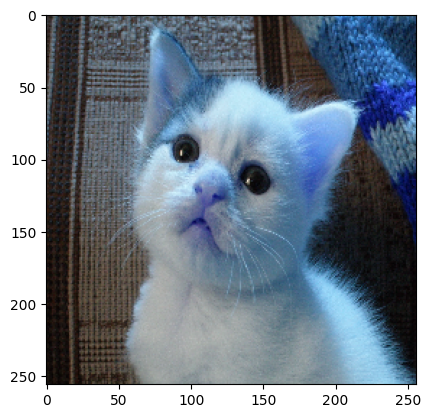

In [81]:
plt.imshow(test_image)


In [82]:
test_image.shape

(256, 256, 3)

In [83]:
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape((1,256,256,3))

In [84]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)